In [ ]:
!pip install numpy pandas scikit-learn imbalanced-learn seaborn matplotlib

In [29]:
# Importing necessary libraries:
# - pandas for data manipulation
# - seaborn and matplotlib for visualization
# - scikit-learn for building and evaluating the model
# - imbalanced-learn for SMOTE (for handling imbalanced data)


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [31]:
# Loading the dataset
data = pd.read_csv('creditcard.csv')

In [32]:
# Display first 5 rows
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [33]:
# Display last 5 rows
print(data.tail())

            Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  

In [34]:
# Shape of the dataset
print('Rows and Columns:', data.shape)

Rows and Columns: (284807, 31)


In [35]:
# Getting info about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
# Checking missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [38]:
# Statistical summary
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

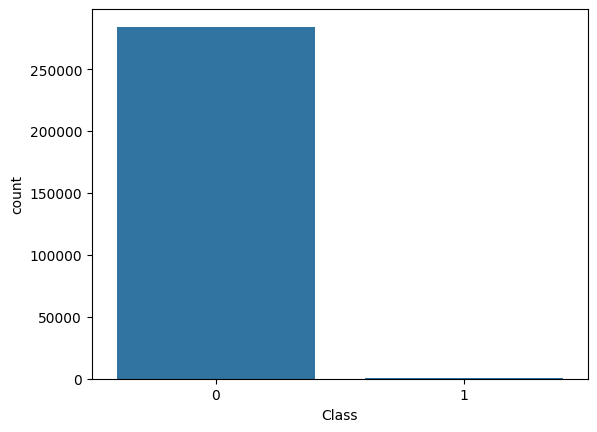

In [ ]:
# Distribution of target variable:-.....
sns.countplot(x='Class', data=data)
plt.show()

In [40]:
# Separating features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Display shapes
print('Features Shape:', X.shape)
print('Target Shape:', y.shape)


Features Shape: (284807, 30)
Target Shape: (284807,)


In [41]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [42]:
# Training Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
# Predicting on training data
train_pred = log_model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
print('Training Accuracy (Logistic Regression):', train_acc)

Training Accuracy (Logistic Regression): 0.9992582676819768


In [44]:
# Predicting on test data
test_pred = log_model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print('Test Accuracy (Logistic Regression):', test_acc)

Test Accuracy (Logistic Regression): 0.9994382219725431


In [45]:
# Classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.88      0.71      0.79        84

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [46]:
# Predicting a single sample (using test set's first row)
sample = X_test.iloc[0].values.reshape(1, -1)
sample_pred = log_model.predict(sample)
print('Prediction (0=Not Fraud, 1=Fraud):', sample_pred[0])

Prediction (0=Not Fraud, 1=Fraud): 0


In [47]:
# Training Decision Tree Classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
# Predicting and checking accuracy
tree_test_pred = tree_model.predict(X_test)
tree_test_acc = accuracy_score(y_test, tree_test_pred)
print('Test Accuracy (Decision Tree):', tree_test_acc)

Test Accuracy (Decision Tree): 0.9992626663389628


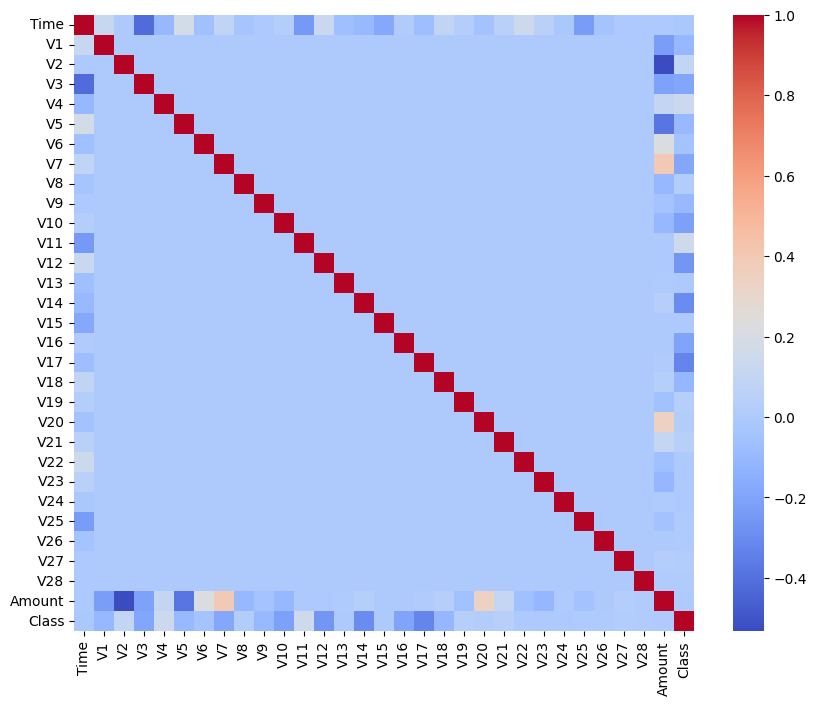

In [49]:
# Plotting correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

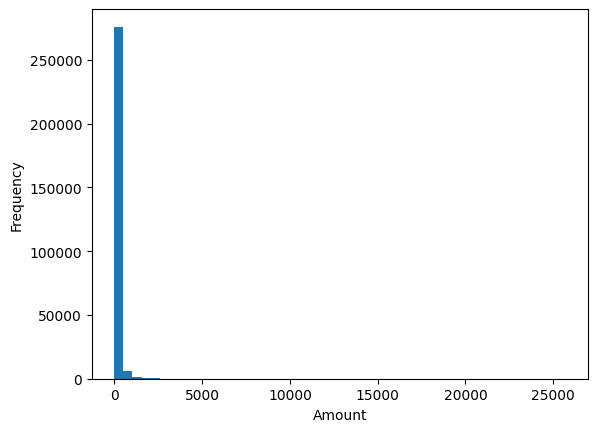

In [50]:
# Plotting histogram of 'Amount' column
plt.hist(data['Amount'], bins=50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()